## Importamos las librerías que necesitaremos durante el proceso

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings  
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6) #Estas dos lineas me ayudan a controlar el tamaño de los plots en el notebook
pd.options.display.max_seq_items = 500 #Aumento el límite de items secuenciales al momento de hacer un print, default = 100
pd.options.display.max_rows = 500 # Aumento en la cantidad de filas impresas
pd.set_option('display.max_colwidth', -1) # Mostrar información completa en las columnas

Populating the interactive namespace from numpy and matplotlib


## Leemos nuestro Dataframe

In [190]:
data = pd.read_csv('../input/palabras-twitter-colombiacsv/palabras_twitter_colombia.csv')

In [191]:
data.head()

,#RANK#,#WORD#,total,lower,titled,upper,other,Abrego,Acevedo,Aguachica,Aguadas,Agustin Codazi,Aipe,Albania,Algeciras,Amalfi,Andes,Apartado,Aquitania,Arauca,Arauquita,Armenia,Astrea,Ayapel,Baranoa,Barbosa Antioquia,Barbosa Santander,Barrancabermeja,Barranquilla,Becerril,Belen de Umbria,Bogota,Bolivar,Bosconia,Bucaramanga,Buenaventura,Buga,Cali,Campo de la Cruz,Caparrapi,...,Soata,Sogamoso,Sonson,Suesca,Tame,Taraza,Tauramena,Tello,Tibu,Tierralta,Timana,Tiquisio,Tocaima,Toledo,Toribio,Trinidad,Tulua,Tumaco,Tunja,Tuquerres,Turbo,Ubate,Uribia,Urrao,Valencia,Valledupar,Venadillo,Ventaquemada,Villa de Leyva,Villanueva Casanare,Villanueva La Guajira,Villavicencio,Villeta,Vistahermosa,Yacopi,Yarumal,Yolombo,Yopal,Zarzal,Zipaquira
0,1,de,10620233,9861214,620715,137948,356,1551,13385,13778,1076,3267,1193,6203,610,643,4709,15222,1903,14299,503,245866,398,1382,73179,37899,8568,152660,590699,1226,5559,1381419,18063,3853,385503,94290,52663,527503,6404,1622,...,1423,34764,1894,61135,1292,582,1512,4570,1181,2085,3187,280,5256,16043,7522,364,86423,2915,125594,807,3118,6645,1962,931,2063,269642,1166,8937,61883,1517,12766,162391,12420,274,507,1891,970,36058,17691,99276
1,2,que,10020172,8681178,1223899,114309,786,1229,13613,17196,450,3436,554,5143,367,313,2529,11075,553,12734,439,318005,290,808,86490,37269,8721,175908,655490,1066,6084,1093530,22013,3593,408522,100345,51725,461968,6323,1444,...,995,35797,841,68848,795,413,1281,4624,801,2093,2400,191,4123,17954,7571,197,95342,2193,90641,682,2601,5728,1570,491,2072,237652,1002,5874,39443,1103,12292,126192,10272,180,530,1617,526,27452,21604,111317
2,3,la,7036656,5823184,1108074,104914,484,852,8757,9400,610,2264,994,4947,395,436,3215,10005,660,9756,352,174520,285,771,52847,25296,5568,104579,433723,903,3544,867415,12906,2574,257357,62669,32131,345742,4612,1267,...,912,21829,1033,38031,908,420,1038,3107,679,1410,1885,155,2959,9883,4662,192,57630,2015,68134,505,2063,3879,1488,523,1393,186638,750,4373,31562,910,10387,108191,9844,185,408,1240,568,22708,12650,61367
3,4,y,6540278,5516761,1023517,0,0,757,8654,9993,422,2188,402,3746,329,312,2135,8396,520,8868,298,176116,228,623,51584,22782,5463,100519,403604,755,3737,783198,12522,2487,247463,60563,32414,319827,4345,969,...,707,21783,796,39341,563,335,910,2848,656,1382,1624,115,2794,10313,4867,187,56077,1620,64929,469,1733,3997,1176,396,1371,175073,687,4397,29648,799,8700,95073,6963,153,330,1045,466,20842,12317,64793
4,5,el,6010208,4795478,1125996,87960,774,665,7613,7932,501,2002,451,3724,414,315,1981,8486,507,7865,289,145899,257,592,47234,21341,4441,88248,378589,712,2965,762774,11013,2373,217107,56520,30270,293640,3992,895,...,817,18256,867,31614,599,310,810,2344,630,1197,1659,151,2467,7902,4120,190,51519,1821,53958,521,1902,3330,934,510,1203,163407,622,3737,24552,760,8460,90612,6949,142,258,1010,434,18902,10745,51747


## ¿Cuántas filas y columnas tenemos?

In [192]:
print('La cantidad de columnas es de:',data.shape[1])
print('La cantidad de filas es de:',data.shape[0])

La cantidad de columnas es de: 244
La cantidad de filas es de: 314999


## ¿Existen valores nulos o faltantes en las columnas?

In [193]:
data.info(null_counts =  True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314999 entries, 0 to 314998
Data columns (total 244 columns):
#RANK#                    314999 non-null int64
#WORD#                    314997 non-null object
total                     314999 non-null int64
lower                     314999 non-null int64
titled                    314999 non-null int64
upper                     314999 non-null int64
other                     314999 non-null int64
Abrego                    314999 non-null int64
Acevedo                   314999 non-null int64
Aguachica                 314999 non-null int64
Aguadas                   314999 non-null int64
Agustin Codazi            314999 non-null int64
Aipe                      314999 non-null int64
Albania                   314999 non-null int64
Algeciras                 314999 non-null int64
Amalfi                    314999 non-null int64
Andes                     314999 non-null int64
Apartado                  314999 non-null int64
Aquitania              

## Hacemos un pequeño análisis del comportamiento de nuestro DataFrame

In [194]:
data.describe()

,#RANK#,total,lower,titled,upper,other,Abrego,Acevedo,Aguachica,Aguadas,Agustin Codazi,Aipe,Albania,Algeciras,Amalfi,Andes,Apartado,Aquitania,Arauca,Arauquita,Armenia,Astrea,Ayapel,Baranoa,Barbosa Antioquia,Barbosa Santander,Barrancabermeja,Barranquilla,Becerril,Belen de Umbria,Bogota,Bolivar,Bosconia,Bucaramanga,Buenaventura,Buga,Cali,Campo de la Cruz,Caparrapi,Caqueza,...,Soata,Sogamoso,Sonson,Suesca,Tame,Taraza,Tauramena,Tello,Tibu,Tierralta,Timana,Tiquisio,Tocaima,Toledo,Toribio,Trinidad,Tulua,Tumaco,Tunja,Tuquerres,Turbo,Ubate,Uribia,Urrao,Valencia,Valledupar,Venadillo,Ventaquemada,Villa de Leyva,Villanueva Casanare,Villanueva La Guajira,Villavicencio,Villeta,Vistahermosa,Yacopi,Yarumal,Yolombo,Yopal,Zarzal,Zipaquira
count,314999.00000,3.149990e+05,3.149990e+05,3.149990e+05,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,3.149990e+05,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,...,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.000000,314999.00000
mean,157500.00000,9.188920e+02,7.192059e+02,1.795881e+02,18.568691,1.529284,0.114937,1.195109,1.327722,0.066213,0.309236,0.067299,0.536897,0.047822,0.042426,0.304674,1.194461,0.085102,1.217578,0.045099,24.698970,0.032962,0.095048,7.530478,3.316303,0.763253,14.286385,57.459649,0.103235,0.489770,1.108844e+02,1.726980,0.343611,34.064791,8.686656,4.628221,44.581551,0.600088,0.138788,1.105042,...,0.107800,3.019111,0.112315,5.488386,0.092038,0.050483,0.129213,0.410004,0.095511,0.189178,0.251083,0.020429,0.416284,1.409551,0.653774,0.026387,8.039086,0.248906,8.759091,0.069451,0.265271,0.529802,0.155766,0.057708,0.187337,23.560373,0.098178,0.594056,4.036686,0.122467,1.187213,13.257779,1.020594,0.020959,0.045035,0.152556,0.069118,2.853504,1.689113,8.98153
std,90932.52306,4.366974e+04,3.739065e+04,7.762250e+03,652.779682,126.600595,5.688588,57.346317,65.335809,3.383949,14.779246,3.904105,25.781324,2.290691,2.197891,15.422647,57.252049,5.226765,58.504347,2.102322,1206.490839,1.612146,4.660295,354.974169,157.933319,36.421022,693.003843,2730.150868,5.072829,24.058495,5.267127e+03,85.063351,16.549699,1659.551952,414.439244,220.361238,2121.214138,28.502241,6.645259,52.374281,...,5.228108,146.430235,5.832324,268.789305,4.585763,2.380789,6.112852,20.023589,4.527166,9.043555,11.855965,0.998700,19.557174,69.522100,31.704973,1.263175,385.438138,11.805271,432.617260,3.221376,12.584796,25.474788,7.803796,3.048304,8.959294,1122.796761,4.672766,29.398393,200.745837,5.779876,58.006367,629.113060,49.152283,1.023483,2.224218,7.415402,3.317559,136.785377,83.372861,436.86926
min,1.00000,5.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

## Encontramos los datos faltantes en el DataFrame 

In [195]:
null_data = data[data.isnull().any(axis = 1)]#¡Súper importante y útil!
null_data

,#RANK#,#WORD#,total,lower,titled,upper,other,Abrego,Acevedo,Aguachica,Aguadas,Agustin Codazi,Aipe,Albania,Algeciras,Amalfi,Andes,Apartado,Aquitania,Arauca,Arauquita,Armenia,Astrea,Ayapel,Baranoa,Barbosa Antioquia,Barbosa Santander,Barrancabermeja,Barranquilla,Becerril,Belen de Umbria,Bogota,Bolivar,Bosconia,Bucaramanga,Buenaventura,Buga,Cali,Campo de la Cruz,Caparrapi,...,Soata,Sogamoso,Sonson,Suesca,Tame,Taraza,Tauramena,Tello,Tibu,Tierralta,Timana,Tiquisio,Tocaima,Toledo,Toribio,Trinidad,Tulua,Tumaco,Tunja,Tuquerres,Turbo,Ubate,Uribia,Urrao,Valencia,Valledupar,Venadillo,Ventaquemada,Villa de Leyva,Villanueva Casanare,Villanueva La Guajira,Villavicencio,Villeta,Vistahermosa,Yacopi,Yarumal,Yolombo,Yopal,Zarzal,Zipaquira
60442,60443,NaN,88,24,41,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,11,0,0,6,1,0,4,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0
90947,90948,NaN,41,36,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0


## Podemos cambiar los faltantes por la media de esos datos

In [196]:
#data['columna_con_valor_nan'].fillna(value = data.['columna_con_valor_nan'].mean())

## También podemos eliminar los datos faltantes si son pocos y no afectan nuestro DF

In [197]:
data.dropna(inplace = True)

In [198]:
data.info(null_counts =  True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314997 entries, 0 to 314998
Data columns (total 244 columns):
#RANK#                    314997 non-null int64
#WORD#                    314997 non-null object
total                     314997 non-null int64
lower                     314997 non-null int64
titled                    314997 non-null int64
upper                     314997 non-null int64
other                     314997 non-null int64
Abrego                    314997 non-null int64
Acevedo                   314997 non-null int64
Aguachica                 314997 non-null int64
Aguadas                   314997 non-null int64
Agustin Codazi            314997 non-null int64
Aipe                      314997 non-null int64
Albania                   314997 non-null int64
Algeciras                 314997 non-null int64
Amalfi                    314997 non-null int64
Andes                     314997 non-null int64
Apartado                  314997 non-null int64
Aquitania              

#### Protip

In [199]:
print (data.loc[290710,'#WORD#':'Zipaquira']) # Imprimir una fila deseada en base a su index

#WORD#                    aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
total                     5                                                                   
lower                     0                                                                   
titled                    5                                                                   
upper                     0                                                                   
other                     0                                                                   
Abrego                    0                                                                   
Acevedo                   0                                                                   
Aguachica                 0                                                                   
Aguadas                   0                                                                   
Agustin Codazi            0                       

## Agrupar los datos por columnas de interés

### Count()
Debido a que ningún valor string se repite en las columnas el count() no nos sirve para este caso

In [200]:
palabras_count = data.groupby('#WORD#')[['#RANK#']].count()
palabras_count.sort_values('#RANK#').reset_index()
palabras_count.columns = ['Total Rank']
palabras_count[:10]

,Total Rank
#WORD#,
a,1
aa,1
aaa,1
aaaa,1
aaaaa,1
aaaaaa,1
aaaaaaa,1
aaaaaaaa,1
aaaaaaaaa,1


### Sum()

In [201]:
palabras_sum = data.groupby('#WORD#')[['#RANK#']].sum()
palabras_sum.sort_values('#RANK#', ascending = False)[:10]
palabras_sum.columns = ['Rango']
palabras_sum[:10]

,Rango
#WORD#,
a,6
aa,6646
aaa,5645
aaaa,7133
aaaaa,10430
aaaaaa,16026
aaaaaaa,22092
aaaaaaaa,28520
aaaaaaaaa,36300


#### Protips

In [202]:
data['Zipaquira'].nunique() # Contar los valores únicos de una columna determinada

952

In [203]:
data['Zipaquira'].unique() # Me devuelve los valores únicos de la columna

array([ 99276, 111317,  61367,  64793,  51747,  60478,  60375,  40788,
        52216,  38890,  38901,  31080,  31756,  27111,  28266,  25242,
        23068,  20521,  19728,  19606,  20070,  16655,  16165,  16877,
        20655,      3,  10039,  17822,  15663,  11866,  12455,     12,
        12453,  13521,   6074,  11967,  10965,      2,   7924,   9652,
         9512,   7951,   9655,     17,   8033,   5110,   8866,   9791,
         7683,      0,   9886,   7199,   6143,   6002,   5921,    226,
         7000,   9544,   6713,   7308,   7149,   3462,   6016,   6834,
         5551,   5260,      1,   5488,   5122,   7051,   3837,   5648,
           42,   3981,   4343,   4803,   3405,    132,   6395,   6174,
         5791,   3848,   5946,     72,   5588,   4051,   4693,   4470,
         4542,      8,   3604,   4477,   4676,   3733,   4787,     16,
         6082,   5867,   5068,   4385,   4447,   4101,   3698,   4178,
         4035,   3673,     15,   3818,   3570,   4840,   3116,   3431,
      

In [204]:
data['Zipaquira'].value_counts(ascending = True) # Funciona en Series NO en DataFrames

378       1     
907       1     
396       1     
908       1     
1932      1     
3981      1     
653       1     
909       1     
1165      1     
1421      1     
654       1     
2959      1     
5260      1     
399       1     
2958      1     
7308      1     
2193      1     
402       1     
395       1     
394       1     
649       1     
3465      1     
641       1     
3712      1     
386       1     
642       1     
898       1     
1666      1     
6016      1     
388       1     
658       1     
644       1     
1412      1     
646       1     
647       1     
3462      1     
2185      1     
648       1     
904       1     
7051      1     
900       1     
914       1     
659       1     
2197      1     
417       1     
929       1     
1185      1     
1441      1     
2211      1     
930       1     
1442      1     
1698      1     
12455     1     
1954      1     
419       1     
931       1     
1187      1     
1188      1     
2212      1   

In [205]:
#data.drop(labels = 'columna_a_eliminar', inplace = True, axis = 1) Eliminar una columna

## Aplicando una función a todo el DataFrame

In [206]:
data['#_letras'] = data['#WORD#'].apply(len) # Agregando una columna con el número de letras por palabra

In [207]:
data.head(15)

,#RANK#,#WORD#,total,lower,titled,upper,other,Abrego,Acevedo,Aguachica,Aguadas,Agustin Codazi,Aipe,Albania,Algeciras,Amalfi,Andes,Apartado,Aquitania,Arauca,Arauquita,Armenia,Astrea,Ayapel,Baranoa,Barbosa Antioquia,Barbosa Santander,Barrancabermeja,Barranquilla,Becerril,Belen de Umbria,Bogota,Bolivar,Bosconia,Bucaramanga,Buenaventura,Buga,Cali,Campo de la Cruz,Caparrapi,...,Sogamoso,Sonson,Suesca,Tame,Taraza,Tauramena,Tello,Tibu,Tierralta,Timana,Tiquisio,Tocaima,Toledo,Toribio,Trinidad,Tulua,Tumaco,Tunja,Tuquerres,Turbo,Ubate,Uribia,Urrao,Valencia,Valledupar,Venadillo,Ventaquemada,Villa de Leyva,Villanueva Casanare,Villanueva La Guajira,Villavicencio,Villeta,Vistahermosa,Yacopi,Yarumal,Yolombo,Yopal,Zarzal,Zipaquira,#_letras
0,1,de,10620233,9861214,620715,137948,356,1551,13385,13778,1076,3267,1193,6203,610,643,4709,15222,1903,14299,503,245866,398,1382,73179,37899,8568,152660,590699,1226,5559,1381419,18063,3853,385503,94290,52663,527503,6404,1622,...,34764,1894,61135,1292,582,1512,4570,1181,2085,3187,280,5256,16043,7522,364,86423,2915,125594,807,3118,6645,1962,931,2063,269642,1166,8937,61883,1517,12766,162391,12420,274,507,1891,970,36058,17691,99276,2
1,2,que,10020172,8681178,1223899,114309,786,1229,13613,17196,450,3436,554,5143,367,313,2529,11075,553,12734,439,318005,290,808,86490,37269,8721,175908,655490,1066,6084,1093530,22013,3593,408522,100345,51725,461968,6323,1444,...,35797,841,68848,795,413,1281,4624,801,2093,2400,191,4123,17954,7571,197,95342,2193,90641,682,2601,5728,1570,491,2072,237652,1002,5874,39443,1103,12292,126192,10272,180,530,1617,526,27452,21604,111317,3
2,3,la,7036656,5823184,1108074,104914,484,852,8757,9400,610,2264,994,4947,395,436,3215,10005,660,9756,352,174520,285,771,52847,25296,5568,104579,433723,903,3544,867415,12906,2574,257357,62669,32131,345742,4612,1267,...,21829,1033,38031,908,420,1038,3107,679,1410,1885,155,2959,9883,4662,192,57630,2015,68134,505,2063,3879,1488,523,1393,186638,750,4373,31562,910,10387,108191,9844,185,408,1240,568,22708,12650,61367,2
3,4,y,6540278,5516761,1023517,0,0,757,8654,9993,422,2188,402,3746,329,312,2135,8396,520,8868,298,176116,228,623,51584,22782,5463,100519,403604,755,3737,783198,12522,2487,247463,60563,32414,319827,4345,969,...,21783,796,39341,563,335,910,2848,656,1382,1624,115,2794,10313,4867,187,56077,1620,64929,469,1733,3997,1176,396,1371,175073,687,4397,29648,799,8700,95073,6963,153,330,1045,466,20842,12317,64793,1
4,5,el,6010208,4795478,1125996,87960,774,665,7613,7932,501,2002,451,3724,414,315,1981,8486,507,7865,289,145899,257,592,47234,21341,4441,88248,378589,712,2965,762774,11013,2373,217107,56520,30270,293640,3992,895,...,18256,867,31614,599,310,810,2344,630,1197,1659,151,2467,7902,4120,190,51519,1821,53958,521,1902,3330,934,510,1203,163407,622,3737,24552,760,8460,90612,6949,142,258,1010,434,18902,10745,51747,2
5,6,a,5975960,5291009,684951,0,0,686,7544,8235,391,1816,356,3455,280,268,1824,7494,399,7908,260,166636,217,587,47864,21827,4927,96748,366910,632,3324,722349,11081,2143,229776,56172,29489,292892,3659,871,...,20155,676,36652,520,280,812,2636,613,1207,1576,134,2694,8781,4192,172,51626,1566,58228,442,1639,3619,927,382,1189,148601,636,3980,26456,747,7108,86002,6524,121,276,952,403,18417,10874,60478,1
6,7,no,5611544,4265127,1214898,131190,329,709,7589,9059,251,1853,262,2919,216,163,1306,6184,257,7088,265,171382,164,479,49830,20165,4748,98367,372343,557,3186,613505,12319,2061,227031,56971,28929,263000,3582,823,...,19573,422,37244,495,249,802,2528,486,1122,1352,112,2259,9990,4309,120,54100,1237,51258,354,1469,3098,887,218,1129,137039,590,3298,22449,619,7045,74417,5773,106,307,815,274,16235,12094,60375,2
7,8,en,5097979,4501941,538178,57683,177,563,6664,6417,541,1661,425,3151,315,319,1975,7536,605,6869,250,110718,240,596,35258,17128,4065,71861,292848,668,2474,719048,8672,2003,181849,43646,22968,271507,3135,761,...,16317,957,24804,608,323,722,2173,538,975,1483,119,2395,6627,3257,151,39789,1656,52166,457,1607,3003,843,425,958,137469,516,3343,24124,696,6380,78734,5827

In [208]:
data['#_letras'].describe()

count    314997.000000
mean     8.446052     
std      3.604925     
min      1.000000     
25%      6.000000     
50%      8.000000     
75%      10.000000    
max      140.000000   
Name: #_letras, dtype: float64

In [209]:
data[data['#_letras'] == 140]['#WORD#'].iloc[0] 
#Encontrar un valor determinado de una columna y mostrar una columna determinada
#El iloc[0] me muestra todo el contenido 

'jajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajaja'

## Merge DataFrames

In [210]:
#En caso de querer combinar dos DataFrames(Asumiendo que queremos mirar relacion de dos variables (x,y) en pro de otra en particular (z)
# by_x = pd.group_by('username')['x'].count().reste_index()
# by_y = pd.group_by('username')['y'].count().reste_index()
# merged_df = pd.merge ([by_x,by_y], how = 'right', right_on = 'x', left_on = 'y')

## Concat two DataFrames

In [211]:
#joined_df = pd.concat([x_dataframe,y_dataframe], axis = 0, ignore_index = True)

In [212]:
data.columns

Index(['#RANK#', '#WORD#', 'total', 'lower', 'titled', 'upper', 'other',
       'Abrego', 'Acevedo', 'Aguachica', 'Aguadas', 'Agustin Codazi', 'Aipe',
       'Albania', 'Algeciras', 'Amalfi', 'Andes', 'Apartado', 'Aquitania',
       'Arauca', 'Arauquita', 'Armenia', 'Astrea', 'Ayapel', 'Baranoa',
       'Barbosa Antioquia', 'Barbosa Santander', 'Barrancabermeja',
       'Barranquilla', 'Becerril', 'Belen de Umbria', 'Bogota', 'Bolivar',
       'Bosconia', 'Bucaramanga', 'Buenaventura', 'Buga', 'Cali',
       'Campo de la Cruz', 'Caparrapi', 'Caqueza', 'Carepa',
       'Cartagena del Chaira', 'Cartagena', 'Caucasia', 'Cerete', 'Chaparral',
       'Chigorodo', 'Chimichagua', 'Chinu', 'Chiquinquira', 'Chiriguana',
       'Cienaga de Oro', 'Cienaga', 'Cimitarra', 'Concordia', 'Corinto',
       'Coyaima', 'Cucuta', 'Cumaral', 'Curumani', 'Dagua', 'Dibulla',
       'Doradal', 'Duitama', 'El Bagre', 'El Banco', 'El Bordo',
       'El Carmen de Bolivar', 'El Carmen', 'El Cerrito', 'El Charco',

In [213]:
data_zipaquira = data.drop(columns = ['Abrego', 'Acevedo', 'Aguachica', 'Aguadas', 'Agustin Codazi', 'Aipe',
       'Albania', 'Algeciras', 'Amalfi', 'Andes', 'Apartado', 'Aquitania',
       'Arauca', 'Arauquita', 'Armenia', 'Astrea', 'Ayapel', 'Baranoa',
       'Barbosa Antioquia', 'Barbosa Santander', 'Barrancabermeja',
       'Barranquilla', 'Becerril', 'Belen de Umbria', 'Bogota', 'Bolivar',
       'Bosconia', 'Bucaramanga', 'Buenaventura', 'Buga', 'Cali',
       'Campo de la Cruz', 'Caparrapi', 'Caqueza', 'Carepa',
       'Cartagena del Chaira', 'Cartagena', 'Caucasia', 'Cerete', 'Chaparral',
       'Chigorodo', 'Chimichagua', 'Chinu', 'Chiquinquira', 'Chiriguana',
       'Cienaga de Oro', 'Cienaga', 'Cimitarra', 'Concordia', 'Corinto',
       'Coyaima', 'Cucuta', 'Cumaral', 'Curumani', 'Dagua', 'Dibulla',
       'Doradal', 'Duitama', 'El Bagre', 'El Banco', 'El Bordo',
       'El Carmen de Bolivar', 'El Carmen', 'El Cerrito', 'El Charco',
       'El Copey', 'El Doncello', 'Espinal', 'Florencia', 'Florida', 'Fonseca',
       'Fresno', 'Fundacion', 'Fusagasuga', 'Garagoa', 'Garzon', 'Gigante',
       'Girardot', 'Granada', 'Guadalupe', 'Guaduas', 'Guamal', 'Guamo',
       'Guatape', 'Hatonuevo', 'Honda', 'Ibague', 'Inirida', 'Ipiales',
       'Isnos', 'Istmina', 'Jamundi', 'La Ceja', 'La Dorada', 'La Hormiga',
       'La Jagua de Ibirico', 'La Loma', 'La Mesa', 'La Plata', 'La Union',
       'Leticia', 'Libano', 'Lorica', 'Luruaco', 'Magangue', 'Mahates',
       'Maicao', 'Majagual', 'Malaga', 'Manaure', 'Manizales', 'Maria la Baja',
       'Mariquita', 'Medellin', 'Melgar', 'Mitu', 'Mocoa', 'Mompos',
       'Moniquira', 'Montelibano', 'Monteria', 'Morales', 'Natagaima',
       'Necocli', 'Neiva', 'Nueva Granada', 'Ocaña', 'Orito', 'Ortega',
       'Pacho', 'Pailitas', 'Paipa', 'Pamplona', 'Pasto', 'Paz de Ariporo',
       'Pelaya', 'Pensilvania', 'Pereira', 'Piendamo', 'Pinillos', 'Pital',
       'Pitalito', 'Pivijay', 'Planadas', 'Planeta Rica', 'Plato', 'Ponedera',
       'Popayan', 'Providencia', 'Puerto Asis', 'Puerto Berrio',
       'Puerto Boyaca', 'Puerto Carreño', 'Puerto Gaitan', 'Puerto Libertador',
       'Puerto Lopez', 'Puerto Rico', 'Puerto Santander', 'Puerto Tejada',
       'Purificacion', 'Quibdo', 'Raquira', 'Repelon', 'Rioblanco', 'Riohacha',
       'Rionegro', 'Riosucio', 'Sabana de Torres', 'Sabanalarga', 'Sahagun',
       'Samana', 'Samaniego', 'San Agustin', 'San Alberto',
       'San Andres Sotavento', 'San Andres', 'San Antonio', 'San Gil',
       'San Jose del Guaviare', 'San Juan Nepomuceno', 'San Juan del Cesar',
       'San Luis', 'San Marcos', 'San Onofre', 'San Vicente de Chucuri',
       'San Vicente del Caguan', 'Santa Barbara', 'Santa Marta',
       'Santa Rosa del Sur', 'Santafe de Antioquia', 'Santander de Quilichao',
       'Saravena', 'Sardinata', 'Segovia', 'Sevilla', 'Sibundoy', 'Sincelejo',
       'Soata', 'Sogamoso', 'Sonson', 'Suesca', 'Tame', 'Taraza', 'Tauramena',
       'Tello', 'Tibu', 'Tierralta', 'Timana', 'Tiquisio', 'Tocaima', 'Toledo',
       'Toribio', 'Trinidad', 'Tulua', 'Tumaco', 'Tunja', 'Tuquerres', 'Turbo',
       'Ubate', 'Uribia', 'Urrao', 'Valencia', 'Valledupar', 'Venadillo',
       'Ventaquemada', 'Villa de Leyva', 'Villanueva Casanare',
       'Villanueva La Guajira', 'Villavicencio', 'Villeta', 'Vistahermosa',
       'Yacopi', 'Yarumal', 'Yolombo', 'Yopal', 'Zarzal'], axis = 1)

In [214]:
data_zipaquira.sort_values(by = 'Zipaquira', ascending = False,inplace = True)

In [215]:
stop_words = pd.read_csv('../input/stopwords/stop_words.csv')

In [216]:
stop_words.head(25)

,Palabra
0,de
1,la
2,que
3,el
4,en
5,y
6,a
7,los
8,del
9,se


In [217]:
data_zipaquira.rename(index = str, columns = {"#WORD#": "Palabra", "#RANK#": "Posicion", 'total': 'Total','titled':'Con_tilde','upper':'Con_mayuscula','other':'Otro'},inplace = True)

In [218]:
data_zipaquira.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314997 entries, 1 to 314998
Data columns (total 9 columns):
Posicion         314997 non-null int64
Palabra          314997 non-null object
Total            314997 non-null int64
lower            314997 non-null int64
Con_tilde        314997 non-null int64
Con_mayuscula    314997 non-null int64
Otro             314997 non-null int64
Zipaquira        314997 non-null int64
#_letras         314997 non-null int64
dtypes: int64(8), object(1)
memory usage: 24.0+ MB


In [219]:
data_zipaquira_sin_stop_words = -data_zipaquira['Palabra'].isin(stop_words.Palabra) # Me devuelve los valores que son False

In [220]:
data_zipaquira_sin_stop_words = data_zipaquira[data_zipaquira_sin_stop_words]

In [221]:
data_zipaquira_sin_stop_words.drop(columns = ['Total','lower','Con_tilde','Con_mayuscula','Otro','Posicion'], inplace = True)

In [222]:
data_zipaquira_sin_stop_words.reset_index(inplace = True, drop = True)

In [223]:
data_zipaquira_sin_stop_words = data_zipaquira_sin_stop_words[data_zipaquira_sin_stop_words['Zipaquira'] != 0 ]

In [224]:
data_zipaquira_sin_stop_words.columns = ['Palabra','Numero_tweets','Numero_letras']
data_zipaquira_sin_stop_words

,Palabra,Numero_tweets,Numero_letras
0,si,20655,2
1,to,19728,2
2,replying,19606,8
3,twitter,16655,7
4,mas,11967,3
5,quiero,9886,6
6,mejor,9791,5
7,hoy,9655,3
8,tan,9544,3
9,vida,9512,4


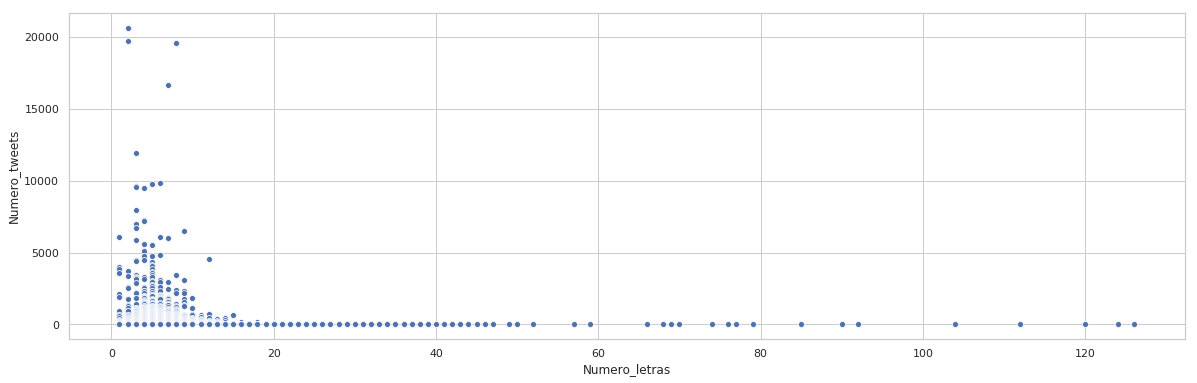

In [225]:
sns.scatterplot(data = data_zipaquira_sin_stop_words, x = data_zipaquira_sin_stop_words['Numero_letras'], y = data_zipaquira_sin_stop_words.Numero_tweets)

In [226]:
data_zipaquira_sin_stop_words[data_zipaquira_sin_stop_words['Numero_letras'] > 15]

,Palabra,Numero_tweets,Numero_letras
1088,jajajajajajajaja,197,16
1419,jajajajajajajajaja,149,18
2021,jajajajajajajajajaja,101,20
2959,jajajajajajajajajajaja,65,22
4270,jajajajajajajajajajajajaja,40,26
4300,jajajajajajajajajajajajajajaja,40,30
4474,jajajajajajajajajajajaja,38,24
6284,jajajajajajajajajajajajajajajaja,24,32
6465,jajajajajajajajajajajajajaja,23,28
8100,cundinamarcahttp,17,16


In [227]:
data_zipaquira_sin_stop_words.sort_values(by = ['Numero_letras'], ascending = False)

,Palabra,Numero_tweets,Numero_letras
50146,jajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajaja,1,126
65901,jajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajaja,1,124
23376,jajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajaja,4,120
41010,jajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajaja,2,112
29966,jajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajaja,2,104
31849,jajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajaja,2,92
38171,muchisisisisisisisisisisisisisisisisisisisisisisisisisisisisisisisimaaaaaaaaaaaaaaaaaaaaaa,2,90
38268,jajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajajaja,2,90
36285,juancamilosimeleesmaricateextrañoextrañoquetequedesconmigoenestosdiasyhastaquedarmedormida,2,90
42729,gooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooolllllllllllllllllll,2,85


In [228]:
data_zipaquira_sin_stop_words = data_zipaquira_sin_stop_words[data_zipaquira_sin_stop_words['Numero_letras'] <16]

In [229]:
data_zipaquira_sin_stop_words.sort_values(by = 'Numero_tweets', ascending = False)

,Palabra,Numero_tweets,Numero_letras
0,si,20655,2
1,to,19728,2
2,replying,19606,8
3,twitter,16655,7
4,mas,11967,3
5,quiero,9886,6
6,mejor,9791,5
7,hoy,9655,3
8,tan,9544,3
9,vida,9512,4


In [230]:
data_zipaquira_sin_stop_words.drop(axis = 0, index = [0,1,2,3,4,10,45], inplace = True)

In [231]:
data_zipaquira_sin_stop_words.reset_index(inplace = True, drop = True)

In [232]:
data_zipaquira_sin_stop_words

,Palabra,Numero_tweets,Numero_letras
0,quiero,9886,6
1,mejor,9791,5
2,hoy,9655,3
3,tan,9544,3
4,vida,9512,4
5,solo,7308,4
6,amor,7199,4
7,día,7000,3
8,ser,6713,3
9,zipaquirá,6523,9


In [233]:
prueba = data_zipaquira_sin_stop_words[:50]

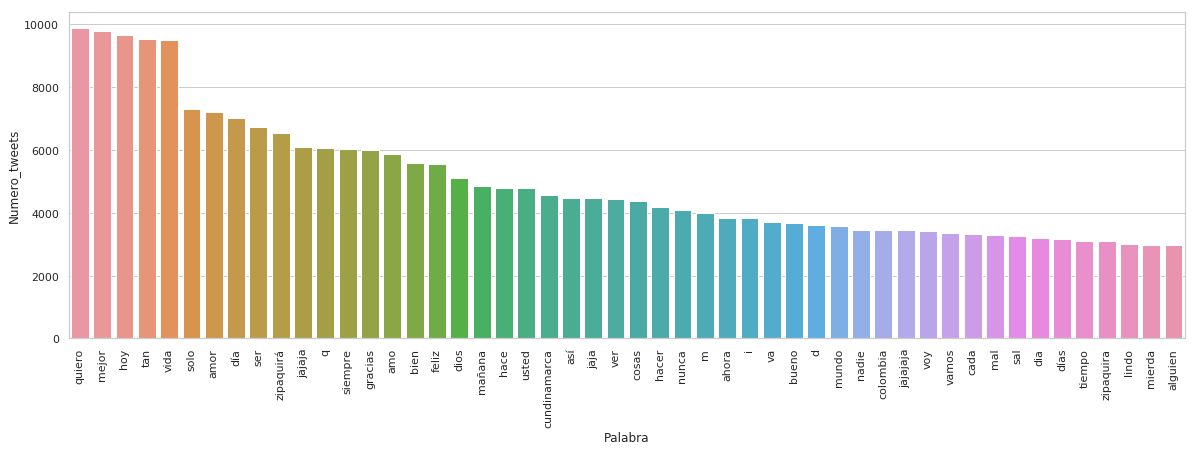

In [234]:
g = sns.barplot(data = prueba, x = 'Palabra', y = 'Numero_tweets',)
sns.set_style("whitegrid")
plt.xticks(rotation = 90)
plt.show()

**Conclusiones**
* Este pequeño análisis sirvió para afianzar conocimientos en limpieza de DataFrame.
* Se evidenció que la cadena de caracteres de mayor longitud es el de la 'risa por chat' el : 'jajaja...' llegando a superar los 100 caracteres varias veces.
* Después de eliminar 'stopwords' y enfocarnos en los tweets trinados desde el municipio de Zipaquirá evidenciamos que las tres palabras que más 'tweetean' los zipaquireños son : 'quiero', 'mejor' y 'hoy' que están por encima de los 90.000 tweets.
* También es importante resalatar la cantidad de errores ortográficos y 'typos' que podemos encontrar en varios de los tweets provenientes de este municipio.